<a href="https://colab.research.google.com/github/neogeolee/Deeplearning/blob/master/tf10_auto_encoder_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/25
이름 : 이태훈
내용 : 딥러닝 오토인코더 개념실습하기
"""
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape
x_train[0]
y_train[0]

11493376/11490434 [==============================] - 0s 0us/step


5

In [ ]:
# 데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0
x_train.shape

(60000, 784)

In [ ]:
# 오토인코더 모델 구성
inputs = Input(shape=(784,))
hidden = Dense(32, activation='relu')(inputs)
outputs = Dense(784, activation='sigmoid')(hidden)

auto_encoder = Model(inputs, outputs)
auto_encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 설정하기
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(x_train, x_train, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0932
Epoch 2/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0932
Epoch 3/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0931
Epoch 4/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0931
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0931
Epoch 6/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0931
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0930
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0930
Epoch 9/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0930
Epoch 10/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0930
Epoch 11/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0930
Epoch 12/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0929
Epoch 13/20
235/235 [====

In [ ]:
# 예측하기
result = auto_encoder.predict(x_test)
result

array([[3.0007474e-12, 2.7344429e-12, 4.0830989e-12, ..., 1.3188905e-11,
        1.5632836e-12, 2.3992143e-11],
       [1.0763685e-12, 4.4474363e-13, 9.4008714e-16, ..., 1.3059101e-13,
        6.4635677e-13, 1.0108282e-13],
       [2.2807681e-08, 1.1218366e-08, 2.0444283e-08, ..., 8.8487999e-09,
        2.3617332e-08, 1.1449735e-08],
       ...,
       [1.7378514e-17, 1.4079511e-17, 2.3774269e-18, ..., 9.7553499e-17,
        1.6967711e-18, 1.1296435e-16],
       [8.5429253e-15, 5.5257939e-15, 1.4421221e-15, ..., 2.7234405e-15,
        3.5201616e-15, 9.2527990e-15],
       [7.4382563e-25, 9.5582726e-25, 1.1398143e-26, ..., 9.0851186e-24,
        8.2896179e-26, 5.4751360e-25]], dtype=float32)

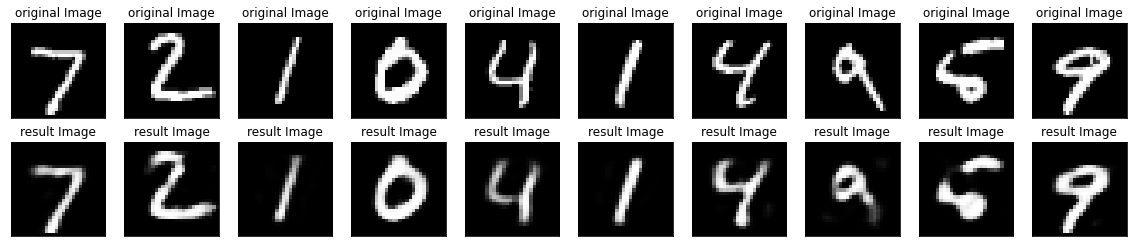

In [ ]:
# 예측값 이미지 출력
plt.figure(figsize=(20, 4))
for i in range(10):
  # original Image
  ax = plt.subplot(2, 10, i+1)
  ax.set_title('original Image')
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # result Image
  ax = plt.subplot(2, 10, i+11)
  ax.set_title('result Image')
  plt.imshow(result[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)